# Milestone 4 - My Project

## Author - Mike Pearson



## Instructions

1. Generate a clear statement problem and provide location for dataset
2. Provide a clear solution to the problem for a non-technical audience
3. Visually explore the data to generate insight and include summary statistics
4. Use an appropriate statistical analysis method
5. Prepare the data via cleaning, normalization, encoding, et cetera
6. Generate and evaluate a working model (hypothesis, linear, or time series)
7. Draw direct inferences and conclusions from model results
8. Use professional coding standards and techniques including:
        explanatory markdown text
        proper code comments
        functions to minimize redundant code
        minimize hard-coded variables


### Goal

I will examine the King's County Housing Data and see if I can come up with a model for predicting home prices.

In [2]:
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv"

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sbn

In [4]:
Trippy = pd.read_csv(fileName)
Housing = pd.DataFrame(Trippy)
print(Housing.tail())
print(Housing.dtypes)
print(Housing.describe())
print(len(Housing))
end = len(Housing)- 1


               id             date     price  bedrooms  bathrooms  \
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view     ...      grade  \
21608         1530      1131     3.0           0     0     ...          8   
21609         2310      5813     2.0           0     0     ...          8   
21610         1020      1350     2.0           0     0     ...          7   
21611         1600      2388     2.0           0     0     ...          8   
21612         1020      1076     2.0           0     0     ...          7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
21608        1530              0      2009  

## Make a TimeSeries

Add a column based on the 'date' column for datatime data to use in timeseries calculations, also make columns with just the year or month or day value.

Drop the 'date' column, the 'id column', the 'lat' and 'long' columns

In [5]:

for i in range(0, end):
    dummy = str(Housing.loc[i,'date'])
    dummy = dummy[0:8]
    mummy = dt.datetime.strptime(dummy,"%Y%m%d" )
    Housing.loc[i,'datetime']= mummy
    
Housing['year'] = Housing['date'].astype(str).str[0:4]
Housing['month'] = Housing['date'].astype(str).str[4:6]
Housing['day'] = Housing['date'].astype(str).str[6:8]
Housing.sort_values(['year','month', 'day'], ascending = (True, True, True))
Housing = Housing.drop('id', axis = 1)
Housing = Housing.drop('date', axis = 1)
Housing = Housing.drop('lat', axis = 1)
Housing = Housing.drop('long', axis = 1)
print(Housing.head())
##print(Housing.describe())
##blchy = '-'.join((Housing.loc[0,1, dummy[0,4:6], dummy[0,6:8]))

      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade ...  sqft_basement  yr_built  yr_renovated  zipcode  \
0     0          3      7 ...              0      1955             0    98178   
1     0          3      7 ...            400      1951          1991    98125   
2     0          3      6 ...              0      1933             0    98028   
3     0          5      7 ...            910      1965             0    98136   
4     0          3      8 ...              0      1987             0    98074   

   sqft_living15  sqft_lot15   datetim

In [6]:
Housing['year'] = Housing['year'].astype(int)
Housing['month'] = Housing['month'].astype(int)
Housing['day'] = Housing['day'].astype(int)


## Make a quick time series plot

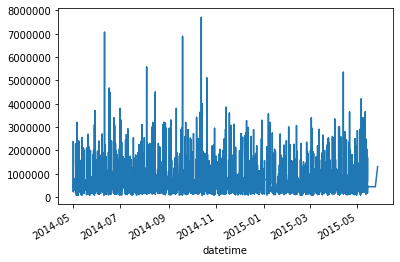

In [7]:
##Price_series = pd.Series(data = Housing['price'], index = Housing['datetime'])
Price_series = pd.Series(data = Housing['price'])
Price_series.index= Housing['datetime']
##print(Price_series.value_counts())
##print(Price_series.tail())
##print(Price_series.describe)
Price_series.plot()

## Some common sense about housing

We know that the price of a house varies with things like number of bathrooms, number of bedrooms, square footage, views, and being(or not) on the waterfront.

I'm curious to see what the pricing looks like if I subset the data to the median number of bedrooms (3) and bathrooms (175)

## Box and whisker plots

some data, let's see what we get.

### How do numbers of bedrooms look when boxplotted?

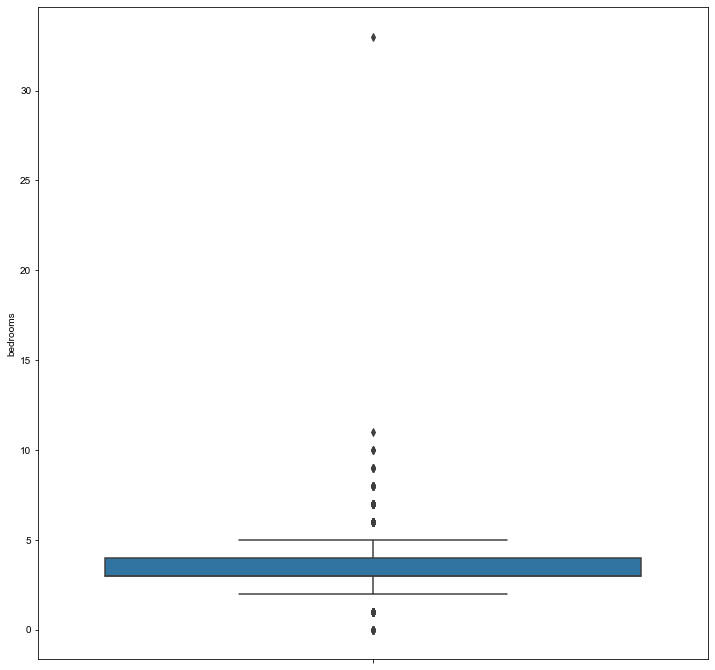

In [8]:
## Take a look at the number of bedrooms
ax = plt.figure(figsize=(12, 12)).gca()

sbn.set_style("whitegrid")

sbn.boxplot(x = 'bedrooms', data = Housing, orient = "v")



### a crazy outlier with 33 bedrooms, I think that one will be excluded from any analysis

### Bathrooms

What does their distribution look like

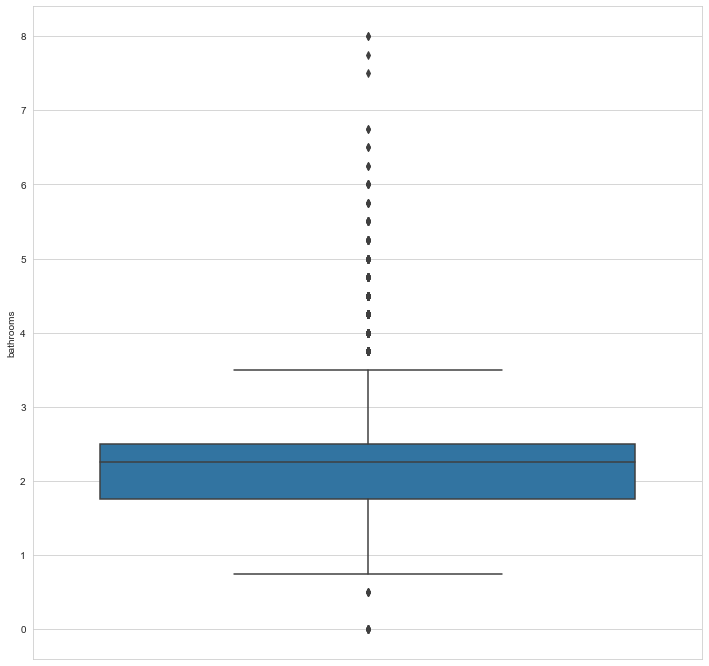

In [9]:
## Take a look at the bathrooms
ax = plt.figure(figsize=(12, 12)).gca()
sbn.boxplot(x = 'bathrooms', data = Housing, orient = "v")



## Now boxplot of bedrooms and bathrooms

More variation that I would have expected

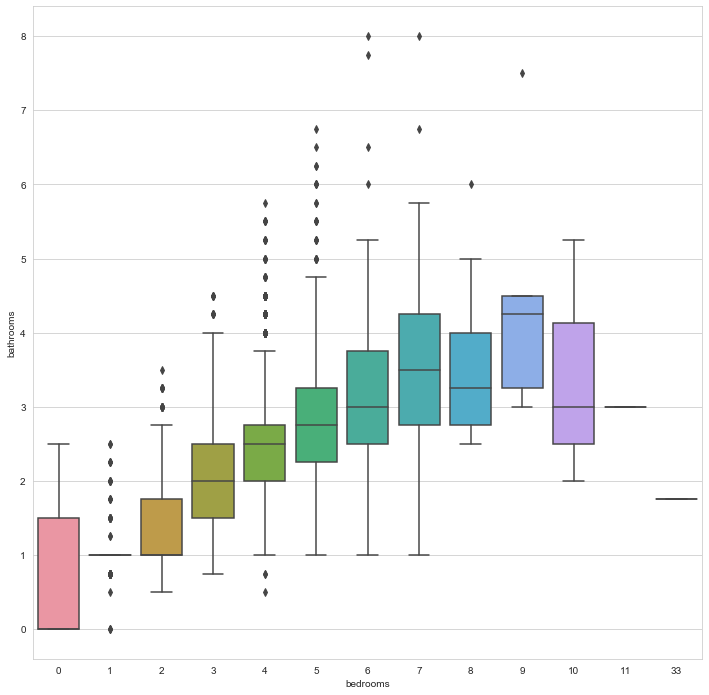

In [10]:
ax = plt.figure(figsize=(12, 12)).gca()
sbn.boxplot(x = 'bedrooms', y = 'bathrooms', data = Housing)

## Bathrooms versus age of house

I wonder if there are more bathrooms per year built

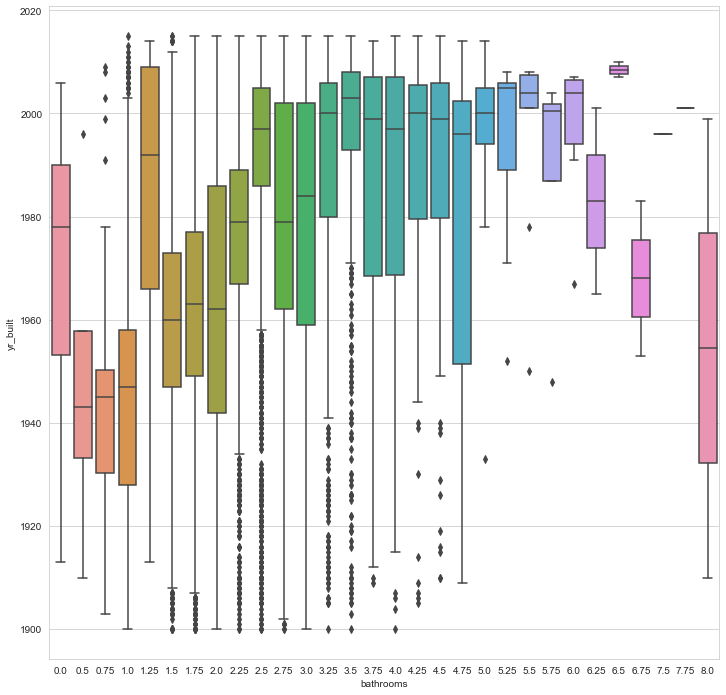

In [11]:
ax = plt.figure(figsize=(12, 12)).gca()
sbn.boxplot(x = 'bathrooms', y = 'yr_built', data = Housing,  )

## Scatter plot

Scatter plot the square foot of living space versus the price, and do it as not on the waterfront (0) or on the waterfront (1).

Looking at the plot, clearly square footage and waterfront will be important predictors

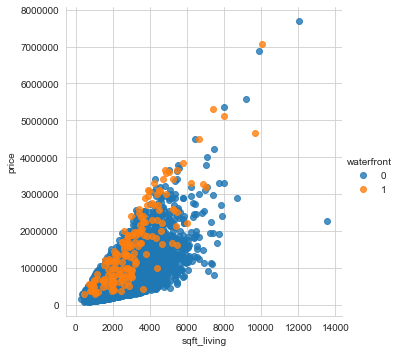

In [12]:

ax = sbn.lmplot(x = 'sqft_living', y = 'price', data = Housing, fit_reg = False, hue = 'waterfront')

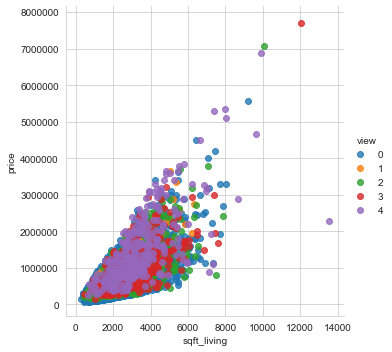

In [13]:
ax = sbn.lmplot(x = 'sqft_living', y = 'price', data = Housing, fit_reg = False, hue = 'view')

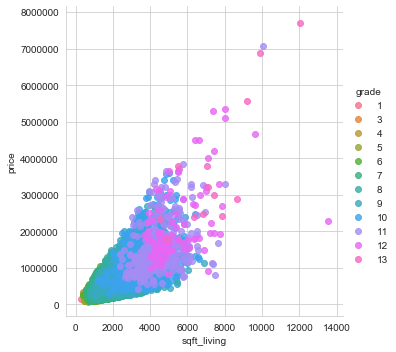

In [14]:
ax = sbn.lmplot(x = 'sqft_living', y = 'price', data = Housing, fit_reg = False, hue = 'grade')

## Housing Seasonality?

Let's look at a restricted set of houses - ones with the median number of bedrooms (3) and bathrooms (1.75) and not on the waterfront, and in the 25-75% of square footage of living space

Is not stationary since the Autocorrelation dies out slowly and the partial autocorrelation does is significant for more than the first term.

## Seasonal

It does not appear that there is much seasonality to the data

1322
datetime
2014-06-26    937000.0
2014-06-24    438000.0
2014-10-21    505000.0
2014-12-07    549000.0
2015-03-16    349000.0
Name: price, dtype: float64


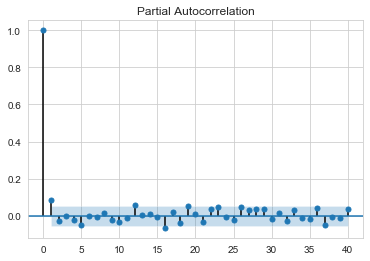

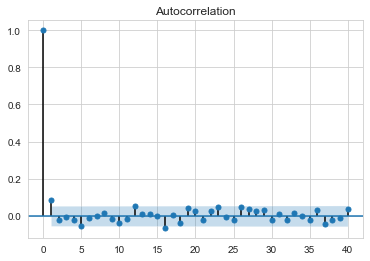

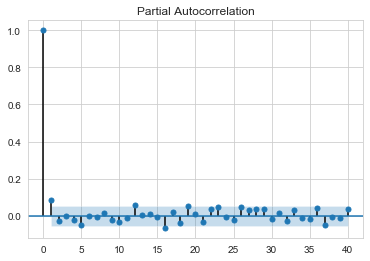

In [15]:
import statsmodels.graphics.tsaplots as splt
Median_house = Housing.query('bedrooms == 3')
Median_house = Median_house.query('bathrooms == 1.75')
Median_house = Median_house.query('waterfront == 0')
Median_house = Median_house.query('sqft_living >= 1427')
Median_house = Median_house.query('sqft_living <= 2550')
indux = Median_house['datetime']
Median_series = pd.Series(data = Median_house['price'])
Median_series.index = indux
##Median_series.index = Median_house['datetime']
print(len(Median_house))
print(Median_series[0:5])
splt.plot_acf(Median_series, lags = 40)
splt.plot_pacf(Median_series, lags = 40)

## Are the waterfront versus non waterfront really different distributions?

The mean of the bootstrapped sampling for waterfront aspiration is  1662093.0437411033
The 95% confidence interval for the turbo aspiration is from  357645.0 to  4467499.999999993
The mean of the bootstrapped sampling for standard aspiration is  531508.9577038586
The 95% confidence interval for the water_not_price is from  185000.0 to  1400000.0


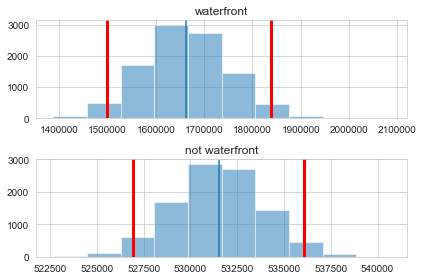

In [16]:

n_replicas = 10000

def plot_hist(x, p=5):
    # Plot the distribution and mark the mean
    plt.hist(x, alpha=.5)
    plt.axvline(x.mean())
    # 95% confidence interval    
    plt.axvline(np.percentile(x, p/2.), color='red', linewidth=3)
    plt.axvline(np.percentile(x, 100-p/2.), color='red', linewidth=3)
    
def plot_dists(a, b, nbins, a_label='pop_A', b_label='pop_B', p=5):
    # Create a single sequence of bins to be shared across both
    # distribution plots for visualization consistency.
    combined = pd.concat([a, b])
    breaks = np.linspace(
        combined.min(), 
        combined.max(), 
        num=nbins+1)

    plt.subplot(2, 1, 1)
    plot_hist(a)
    plt.title(a_label)
    
    plt.subplot(2, 1, 2)
    plot_hist(b)
    plt.title(b_label)
    
    plt.tight_layout()
    


waterfront = Housing.query('waterfront == 1')
water_not = Housing.query('waterfront == 0')

##
waterfront_price = waterfront['price']
waterfront_price_bootstrap_means = pd.Series([
    waterfront_price.sample(frac=1, replace=True).mean()
    for i in range(n_replicas)])

water_not_price = water_not['price']
water_not_price_bootstrap_means = pd.Series([
    water_not_price.sample(frac=1, replace=True).mean()
    for i in range(n_replicas)])
##
plot_dists(waterfront_price_bootstrap_means, water_not_price_bootstrap_means, 
           nbins=80, a_label='waterfront', b_label='not waterfront')
p = 5
print("The mean of the bootstrapped sampling for waterfront aspiration is " , np.mean(waterfront_price_bootstrap_means)) 
print("The 95% confidence interval for the turbo aspiration is from ", np.percentile(waterfront_price, p/2.), "to ", np.percentile(waterfront_price, 100-p/2.))
print("The mean of the bootstrapped sampling for standard aspiration is " , np.mean(water_not_price_bootstrap_means))
print("The 95% confidence interval for the water_not_price is from ", np.percentile(water_not_price, p/2.), "to ", np.percentile(water_not_price, 100-p/2.))

## Waterfront

As anyone could tell you, the distribution of pricing for waterfront properties is different from the distribution of non-waterfront properties

## Ready for linear regression

1. Let's normalize the price, replace outliers with the mean
2. Norm the square footage of living space
3. Get rid of outliers in terms of number of bedrooms (more than 9) 
4. Get rid of outlier in terms of number of bathrooms (more than 4)
5. Make the year a category (2014, yes or no)
6. Get the age of the house


In [23]:
price_lo = np.min(Housing['price'])
price_hi = np.mean(Housing['price']) + 2*np.std(Housing['price'])
price_max = np.max(Housing['price'])
price_mean = np.mean(Housing['price'])
price_min = int(price_mean)
Housing['price_normed'] = (Housing['price'] - price_mean)/(price_max - price_min)
maxfoot = np.max(Housing['sqft_living'])
minfoot = np.min(Housing['sqft_living'])
meanfoot = np.mean(Housing['sqft_living'])
Housing['normed_living'] = (Housing['sqft_living']- meanfoot)/(maxfoot - minfoot)
Housing['2015year']= (Housing['year'] == 2015).astype(int)
Housing['renovated']= (Housing['yr_renovated'] != 0).astype(int)
Housing['age']= Housing['year']- Housing['yr_built']

Try1 = Housing.query('price > 75000')
Try2 = Try1.query('price < 1274000')
##print(Try2.head())
Housing_beds = Try2.query('bedrooms < 10')
Housing_bnb = Housing_beds.query('bathrooms < 4')
Training1 = Housing_bnb.query('year == 2014')
Training2 = Housing_bnb.query('year == 2015')
Training3 = Training2.query('month < 3')
Test = Training2.query('month >= 3')
Training = Training1.append(Training3)

##print((Test.head()))
print(Training.head())
print(len(Training2))
print(len(Training3))
print(len(Training))
print(Training.dtypes)

       price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   221900.0         3       1.00         1180      5650     1.0           0   
1   538000.0         3       2.25         2570      7242     2.0           0   
3   604000.0         4       3.00         1960      5000     1.0           0   
6   257500.0         3       2.25         1715      6819     2.0           0   
11  468000.0         2       1.00         1160      6000     1.0           0   

    view  condition  grade ...   sqft_lot15   datetime  year  month  day  \
0      0          3      7 ...         5650 2014-10-13  2014     10   13   
1      0          3      7 ...         7639 2014-12-09  2014     12    9   
3      0          5      7 ...         5000 2014-12-09  2014     12    9   
6      0          3      7 ...         6819 2014-06-27  2014      6   27   
11     0          4      7 ...         6000 2014-05-27  2014      5   27   

    price_normed  normed_living 2015year  renovated  age  
0  

In [25]:
import sklearn.linear_model as lm
import sklearn as sk
X = Training[['2015year', 'month', 'day','bedrooms','bathrooms', 'waterfront', 'view', 'grade',
                 'renovated', 'normed_living','age']]
Y = pd.DataFrame()
Y['price_normed'] = Training['price_normed']


from sklearn.model_selection import train_test_split

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

lm_mod = lm.LinearRegression(fit_intercept = True)
mod_fit = lm_mod.fit(X_train, y_train)
y_test['scores'] = mod_fit.predict(X_test)
y_test['resids'] = y_test['scores'] - y_test['price_normed']
print(y_test.tail())

       price_normed    scores    resids
9696      -0.031437 -0.028308  0.003129
19026      0.025819  0.020968 -0.004851
3844      -0.045173 -0.027848  0.017325
15563      0.029318  0.012939 -0.016379
20391      0.022334  0.012756 -0.009578


/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


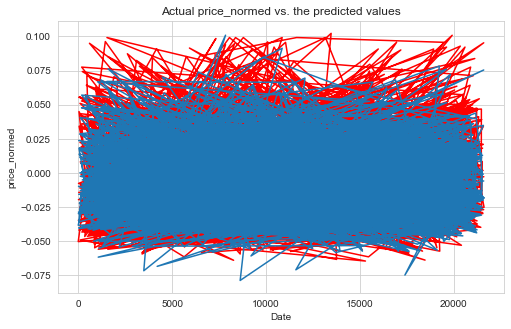

In [27]:
def plot_mod_fit(df, col):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(8, 5)) # set plot area
    ax = fig.gca() # define axis  
    df.loc[:, col].plot(color = 'r', ax = ax)
    df.loc[:, 'scores'].plot(ax = ax) 
    ax.set_title('Actual ' + col + ' vs. the predicted values') # Give the plot a main title
    ax.set_xlabel('Date') # Set text for the x axis
    ax.set_ylabel(col)# Set text for y axis
plot_mod_fit(y_test, 'price_normed')  

## Multiple Regression

Let's look at as many parameters as seem possible, and then winnow them down to a smaller, more reasonable set

In [123]:
import statsmodels.api as sm
X = Training[['month', 'day','bedrooms','bathrooms', 'waterfront', 'view', 'grade',
                 'renovated', 'normed_living','age']]
##X = sm.add_constant(X)
statmod = sm.OLS(Y,X)
res = statmod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           price_normed   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     1793.
Date:                Thu, 21 Feb 2019   Prob (F-statistic):               0.00
Time:                        21:51:38   Log-Likelihood:                 38517.
No. Observations:               16038   AIC:                        -7.701e+04
Df Residuals:                   16028   BIC:                        -7.694e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
month            -0.0006   5.57e-05    -11.011

## Reduction of parameters

Let's get rid of the bathrooms parameter (kinda surprising)

In [132]:
X = Training[['month', 'day','bedrooms', 'waterfront', 'view', 'grade',
                 'renovated', 'normed_living','age','zipcode']]
##X = sm.add_constant(X)
statmod = sm.OLS(y_train,X_train)
res = statmod.fit()
Training['scores'] = res.predict(X)
Training['resids'] = Training['scores'] - Training['price_normed']
##print(Training.tail())
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           price_normed   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     2535.
Date:                Thu, 21 Feb 2019   Prob (F-statistic):               0.00
Time:                        22:07:41   Log-Likelihood:                 40102.
No. Observations:               16038   AIC:                        -8.018e+04
Df Residuals:                   16028   BIC:                        -8.011e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
month         -3.373e-05   5.14e-05     -0.657

## Comparing to the actual

In [133]:
X = Test[['month', 'day','bedrooms', 'waterfront', 'view', 'grade',
                 'renovated', 'normed_living','age', 'zipcode']]
Test['scores'] = res.predict(X)
Test['resids'] = Test['scores'] - Test['price_normed']

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


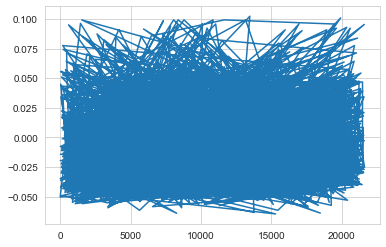

In [29]:
##Price_series = pd.Series(data = Housing['price'], index = Housing['datetime'])
Price_series = pd.Series(data = y_test['price_normed'])
Price_series.index= y_test.index
##print(Price_series.value_counts())
##print(Price_series.tail())
##print(Price_series.describe)
Price_series.plot() 

## Summary


We have looked at various parameters involved in pricing and seen that waterfront versus not waterfront is very different. We have determined that there is not a lot of seasonality in the data on pricing (for the relatively short season).  

We have created a model for the pricing (normed pricing) and seen that pricing can be modestly predicted based on square footage of living space, view, number of bedrooms, the age of the house, and the zip code. Anyone wanting to predict a selling price can use the model res.predict in the next to last section.